### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-22/11/19
#### Clasificacion de RWE-DWT de MI-EEG con Conv-LSTM-2D
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dropout, Flatten, Dense
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [6]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [7]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#convertir de 2D a 5D
x_train = x_train.reshape((n_samples_train, 1, 1, 3, 22))
x_test = x_test.reshape((n_samples_test, 1, 1, 3, 22))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1, 3, 22)
(288, 1, 1, 3, 22)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 [==============================] - 0s 214us/sample - loss: 1.5194 - acc: 0.4931
kappa:  0.32407407407407407
confusion matrix:
 [[31 23 11  7]
 [18 45  8  1]
 [10  3 25 34]
 [12  1 18 41]]
(0.48970535709398244, 0.4930555555555555, 0.49018325499728965, None)


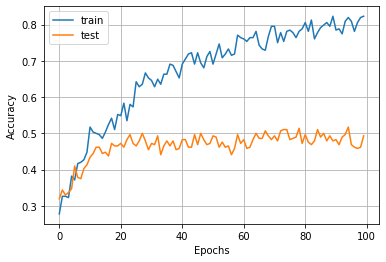

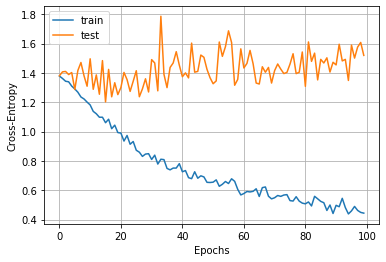

Iteration: 2
288/288 [==============================] - 0s 97us/sample - loss: 1.8690 - acc: 0.4826
kappa:  0.31018518518518523
confusion matrix:
 [[52 12  2  6]
 [40 26  4  2]
 [17  3 24 28]
 [15  2 18 37]]
(0.5077138291422171, 0.48263888888888884, 0.47328274638191115, None)


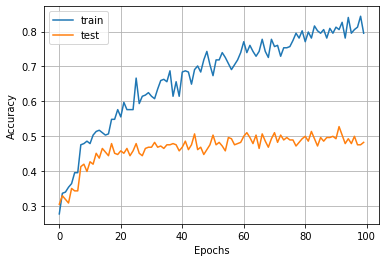

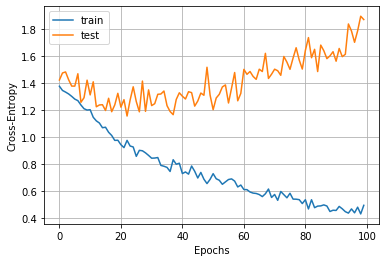

Iteration: 3
288/288 [==============================] - 0s 113us/sample - loss: 1.4966 - acc: 0.5556
kappa:  0.40740740740740744
confusion matrix:
 [[50  9  6  7]
 [25 37  9  1]
 [11  0 30 31]
 [11  0 18 43]]
(0.5800981159264113, 0.5555555555555556, 0.5554301558212901, None)


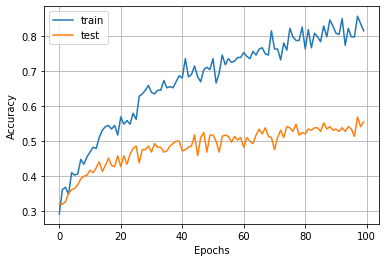

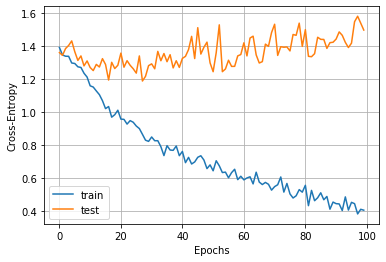

Iteration: 4
288/288 [==============================] - 0s 106us/sample - loss: 1.6036 - acc: 0.5069
kappa:  0.34259259259259256
confusion matrix:
 [[31 30  5  6]
 [14 52  5  1]
 [15  4 31 22]
 [14  2 24 32]]
(0.5028353126713783, 0.5069444444444444, 0.5021038215727299, None)


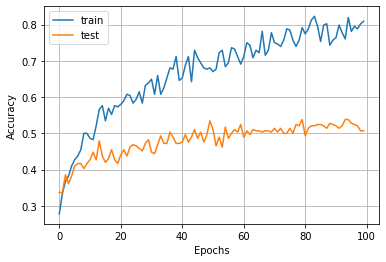

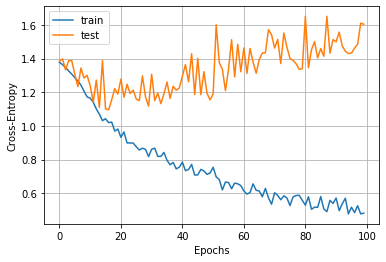

Iteration: 5
288/288 [==============================] - 0s 98us/sample - loss: 1.6614 - acc: 0.5417
kappa:  0.38888888888888884
confusion matrix:
 [[42 20  3  7]
 [21 44  6  1]
 [17  2 30 23]
 [13  2 17 40]]
(0.5494415735399112, 0.5416666666666667, 0.5414632242757244, None)


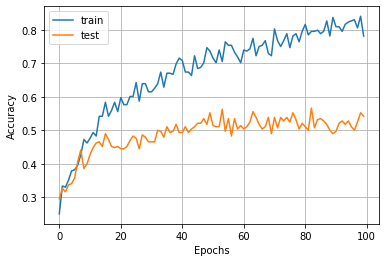

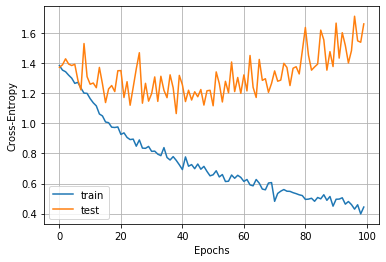

Iteration: 6
288/288 [==============================] - 0s 97us/sample - loss: 1.4378 - acc: 0.5208
kappa:  0.36111111111111116
confusion matrix:
 [[38 21  9  4]
 [20 47  4  1]
 [13  2 29 28]
 [13  1 22 36]]
(0.5223042284504126, 0.5208333333333334, 0.5204077576574447, None)


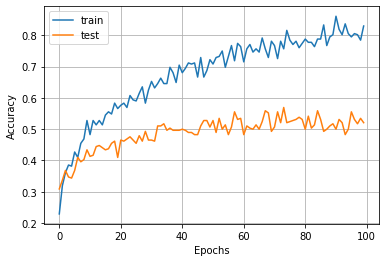

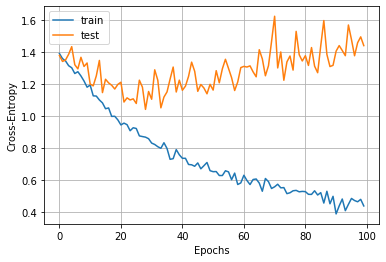

Iteration: 7
288/288 [==============================] - 0s 88us/sample - loss: 1.7533 - acc: 0.4965
kappa:  0.3287037037037037
confusion matrix:
 [[36 26  4  6]
 [16 50  5  1]
 [13  7 29 23]
 [16  5 23 28]]
(0.49269867984537286, 0.4965277777777778, 0.4906119229068146, None)


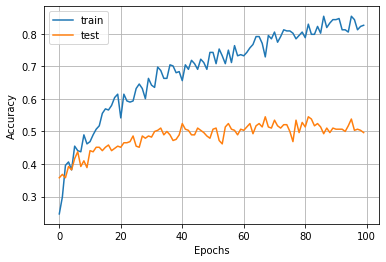

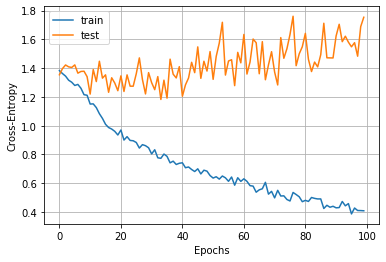

Iteration: 8
288/288 [==============================] - 0s 97us/sample - loss: 1.4404 - acc: 0.5417
kappa:  0.38888888888888884
confusion matrix:
 [[42 18  5  7]
 [24 42  4  2]
 [11  3 29 29]
 [10  5 14 43]]
(0.5472405461840891, 0.5416666666666667, 0.5395338313860745, None)


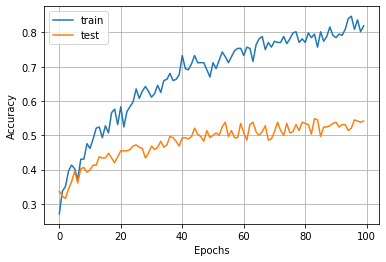

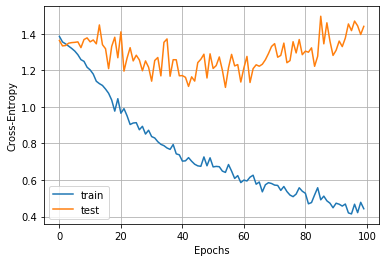

Iteration: 9
288/288 [==============================] - 0s 126us/sample - loss: 1.7607 - acc: 0.5243
kappa:  0.3657407407407407
confusion matrix:
 [[47 17  2  6]
 [27 40  4  1]
 [22  0 28 22]
 [12  2 22 36]]
(0.5417493601815635, 0.5243055555555556, 0.5239891725946151, None)


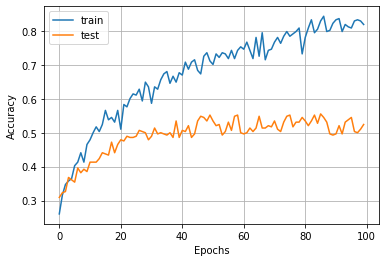

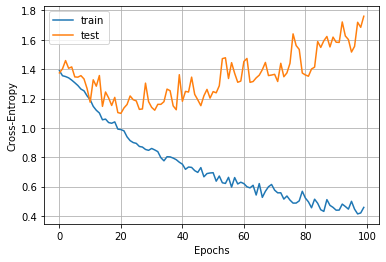

Iteration: 10
288/288 [==============================] - 0s 96us/sample - loss: 1.3425 - acc: 0.5312
kappa:  0.375
confusion matrix:
 [[35 24  7  6]
 [20 44  7  1]
 [ 5  2 35 30]
 [ 8  1 24 39]]
(0.5317585354358647, 0.53125, 0.5312925657753245, None)


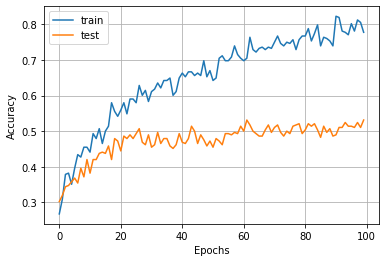

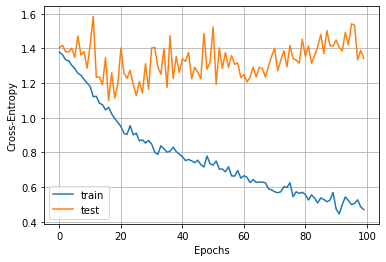


Resultados:
loss: [1.519383152325948, 1.8690068456861708, 1.4965519838862948, 1.6036241584353976, 1.6614397366841633, 1.437847958670722, 1.7532776064342923, 1.4404121504889593, 1.7607187430063884, 1.3425329724947612]
accuracy: [0.49305555, 0.4826389, 0.5555556, 0.5069444, 0.5416667, 0.5208333, 0.4965278, 0.5416667, 0.5243056, 0.53125]
kappa: [0.32407407407407407, 0.31018518518518523, 0.40740740740740744, 0.34259259259259256, 0.38888888888888884, 0.36111111111111116, 0.3287037037037037, 0.38888888888888884, 0.3657407407407407, 0.375]
precision: [0.48970535709398244, 0.5077138291422171, 0.5800981159264113, 0.5028353126713783, 0.5494415735399112, 0.5223042284504126, 0.49269867984537286, 0.5472405461840891, 0.5417493601815635, 0.5317585354358647]
recall: [0.4930555555555555, 0.48263888888888884, 0.5555555555555556, 0.5069444444444444, 0.5416666666666667, 0.5208333333333334, 0.4965277777777778, 0.5416666666666667, 0.5243055555555556, 0.53125]
f1: [0.49018325499728965, 0.47328274638191115, 

In [11]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(ConvLSTM2D(32, (1,3), activation='relu', input_shape=(1,1,3,22)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [12]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_9 (ConvLSTM2D)  (None, 1, 1, 32)          20864     
_________________________________________________________________
dropout_18 (Dropout)         (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 260       
Total params: 23,236
Trainable params: 23,236
Non-trainable params: 0
__________________________________________________

In [13]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.5194
std: (+/- 0.0228)
kappa: 0.3593
precision: 0.5266
recall: 0.5194
f1: 0.5168
